## Library

In [1]:
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K, M, B, T

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
print('Loaded 1')

exec(open('utils.py').read())
print('Loaded 2')

exec(open('modules/tai_timelines.py').read())
print('Loaded TAI timelines module')


Loaded 1
Loaded 2
Loaded TAI timelines module


## Variables

In [2]:
# Global variables - probably don't want to change these but you could.
RUNS = 10000                                      # Number of runs to do (default 10000)
CURRENT_YEAR = 2023                               # What year to start the run on? (default: 2023)
MAX_YEAR = 2123                                   # What year to end the run on? (default: 2123)
years = list(range(CURRENT_YEAR, MAX_YEAR))
VARIABLE_SETS = {}


VARIABLE_SETS['Cotra2020'] = {
    'initial_gdp': 23*T,                  # GDP in `CURRENT_YEAR` of country that will develop TAI (default: 23 trillion)
    'algo_doubling_rate_max': 3.5,        # 90% CI, algorithms get twice as efficient every X years (maximum)
    'algo_doubling_rate_min': 2,          # 90% CI, algorithms get twice as efficient every X years (minimum)
    'min_reduction': 2,                   # 90% CI, the minimum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'max_reduction': 5,                   # 90% CI, the maximum amount of OOMs of reduction in TAI size algorithm improvements could acheive
    'initial_flop_per_dollar': 17.3,      # 90% CI, as of today, we can buy 10^X FLOP per $ (originally 17 for 2020)
    'flop_halving_rate': 2.5,             # 90% CI, the cost of FLOP per $ halves every X years
    'max_flop_per_dollar': 24,            # 90% CI, the cheapest FLOP will get is 10^X FLOPs per $
    'initial_pay': 9,                     # 90% CI, as of today the maximum we would pay for TAI is $10^X (originally 8.7 for 2020)
    'gdp_growth': 1.03,                   # 90% CI, GDP will increase by a factor of X each year
    'max_gdp_frac': 0.01,                 # 90% CI, the maximum % of GDP that would be spent on TAI is $10^X
    'spend_doubling_time': 2.5            # 90% CI, our willingness to spend on TAI doubles every X years
}


VARIABLE_SETS['Cotra2022'] = deepcopy(VARIABLE_SETS['Cotra2020'])
VARIABLE_SETS['Cotra2022']['initial_flop_per_dollar'] = 18.3 # (originally 18 for 2020)
print('Loaded')

Loaded


In [3]:
cotra_2020_tai_flop_size = sq.sample(load_cache_file='caches/cotra_2020')  # Cache generated in "Anchors" notebook
cotra_2020_tai_flop_size = [round(t, 1) for t in cotra_2020_tai_flop_size]
# 90% CI, it takes 10^X FLOP to run a transformative AI at inference.
# Note: A petaflop/s-day (pfs-day) consists of performing 10^15 neural net operations per second for one day, or a total of about 10^20 operations
VARIABLE_SETS['Cotra2020']['tai_flop_size'] = cotra_2020_tai_flop_size
sq.get_percentiles(cotra_2020_tai_flop_size)


{1: 26.0,
 5: 27.4,
 10: 28.4,
 20: 30.5,
 30: 32.1,
 40: 33.7,
 50: 35.2,
 60: 36.9,
 70: 38.6,
 80: 41.0,
 90: 46.0,
 95: 63.70499999999993,
 99: 68.20100000000002}

In [4]:
cotra_2022_tai_flop_size = sq.sample(load_cache_file='caches/cotra_2022')  # Cache generated in "Anchors" notebook
cotra_2022_tai_flop_size = [round(t, 1) for t in cotra_2022_tai_flop_size]
VARIABLE_SETS['Cotra2022']['tai_flop_size'] = cotra_2022_tai_flop_size
sq.get_percentiles(cotra_2022_tai_flop_size)

{1: 26.0,
 5: 27.3,
 10: 28.2,
 20: 29.9,
 30: 31.5,
 40: 33.0,
 50: 34.3,
 60: 35.7,
 70: 37.3,
 80: 39.4,
 90: 42.9,
 95: 52.509999999999856,
 99: 67.5}

## Run Cotra 2020

-
-
## SAMPLE RUN 1 ##
It takes 35.6 log FLOP (~398 decillion) for transformative capabilities.
Every 2.0 years algorithms get 2x better, with 3 log reductions possible.
FLOP start at a cost of 17.3 log FLOP (~200 quadrillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are initially willing to pay 9.0 log 2022$USD (~1 billion). This doubles every 2.5 years to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 26.3 max log FLOP (199 septillion) available - TAI takes 35.6 log FLOP (398 decillion) - log $ 18.3 to buy TAI (2 quintillion) vs. willingness to pay log $ 9.0 (996 million) - 17.3 log FLOP per $ (200 quadrillion)
Year: 2024 - 26.5 max log FLOP (345 septillion) available - TAI takes 35.5 log FLOP (282 decillion) - log $ 18.0 to buy TAI (1 quintillion) vs. willingness to pay log $ 9.1 (1 billion) - 17.4 log FLOP per $ (263 quadrillion)
Year: 2025 - 26.8 max log FLOP (601 septillion) a

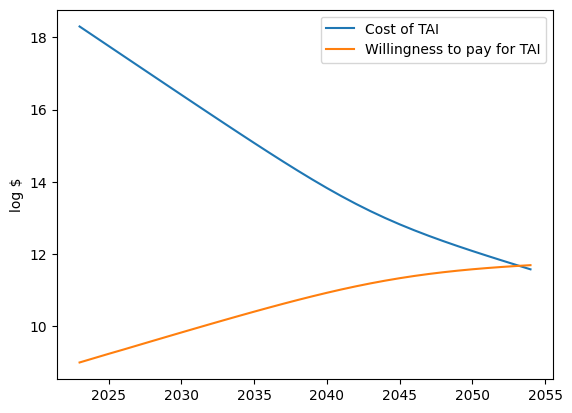

-
-
## SAMPLE RUN 2 ##
It takes 33.0 log FLOP (~1000 nonillion) for transformative capabilities.
Every 2.5 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 17.3 log FLOP (~200 quadrillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are initially willing to pay 9.0 log 2022$USD (~1 billion). This doubles every 2.5 years to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 26.3 max log FLOP (199 septillion) available - TAI takes 33.0 log FLOP (1000 nonillion) - log $ 15.7 to buy TAI (5 quadrillion) vs. willingness to pay log $ 9.0 (996 million) - 17.3 log FLOP per $ (200 quadrillion)
Year: 2024 - 26.5 max log FLOP (345 septillion) available - TAI takes 32.9 log FLOP (768 nonillion) - log $ 15.5 to buy TAI (3 quadrillion) vs. willingness to pay log $ 9.1 (1 billion) - 17.4 log FLOP per $ (263 quadrillion)
Year: 2025 - 26.8 max log FLOP (601 septillion)

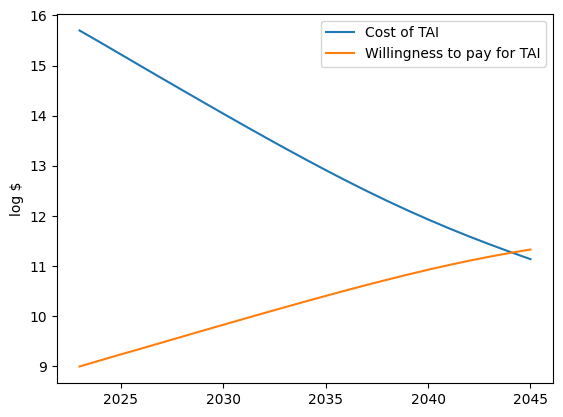

-
-
## SAMPLE RUN 3 ##
It takes 38.5 log FLOP (~316 thousand decillion) for transformative capabilities.
Every 2 years algorithms get 2x better, with 4 log reductions possible.
FLOP start at a cost of 17.3 log FLOP (~200 quadrillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are initially willing to pay 9.0 log 2022$USD (~1 billion). This doubles every 2.5 years to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 26.3 max log FLOP (199 septillion) available - TAI takes 38.5 log FLOP (316 thousand decillion) - log $ 21.2 to buy TAI (2 sextillion) vs. willingness to pay log $ 9.0 (996 million) - 17.3 log FLOP per $ (200 quadrillion)
Year: 2024 - 26.5 max log FLOP (345 septillion) available - TAI takes 38.3 log FLOP (224 thousand decillion) - log $ 20.9 to buy TAI (849 quintillion) vs. willingness to pay log $ 9.1 (1 billion) - 17.4 log FLOP per $ (263 quadrillion)
Year: 2025 - 26.8 max l

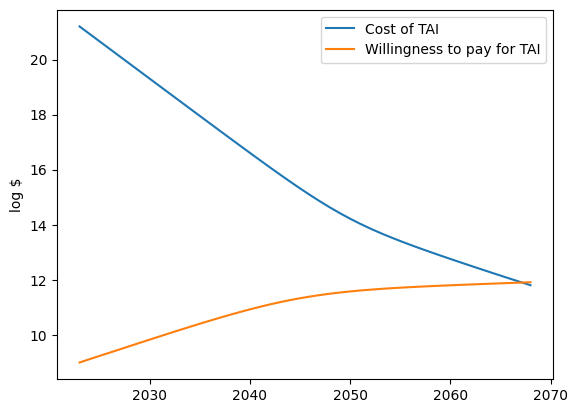

-
-
## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:18<00:00, 554.35it/s]

Shuffling data...
Waiting for other cores...
.

.Collecting data...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 705.61it/s]

...Collected!
Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!
-
## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2027',
 '10%: 2030',
 '15%: 2033',
 '20%: 2036',
 '25%: 2040',
 '35%: 2045',
 '50%: 2052',
 '60%: 2064',
 '75%: 2087',
 '80%: >2123',
 '90%: >2123',
 '95%: >2123']
-
-
## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 4 years from now',
 '10%: 7 years from now',
 '15%: 10 years from now',
 '20%: 13 years from now',
 '25%: 17 years from now',
 '35%: 22 years from now',
 '50%: 29 years from now',
 '60%: 41 years from now',
 '75%: 64 years from now',
 '80%: >100 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
-
-
## TAI ARRIVAL DATE BY BIN ##
This year: 1.4%
2024-2027: 2.6%
2028-2029: 4.8%
2030-2034: 8.4%
2035-2039: 7.8%
2040-2049: 21.7%
2050-2059: 9.6%
2060-2069: 12.4%
2070-2079: 5.0%
2080-2089: 1.8%
2090-2099: 0.7%
2100-2109: 0.4%
2110-2119: 0.4%
>2120: 23.2%
-
-
## TAI ARRIVAL DATE BY YEAR ##
By EOY 2024: 2.4%
By EOY 2025: 2.8%

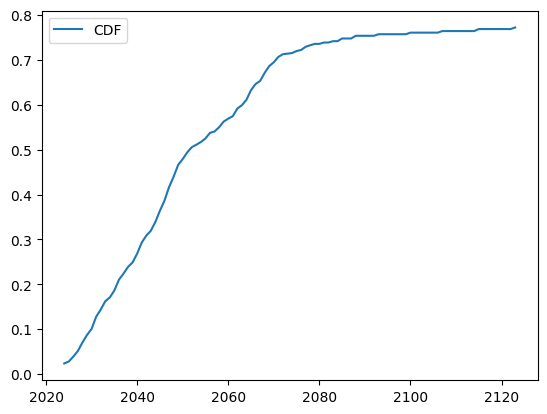

<string>:173: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<string>:174: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

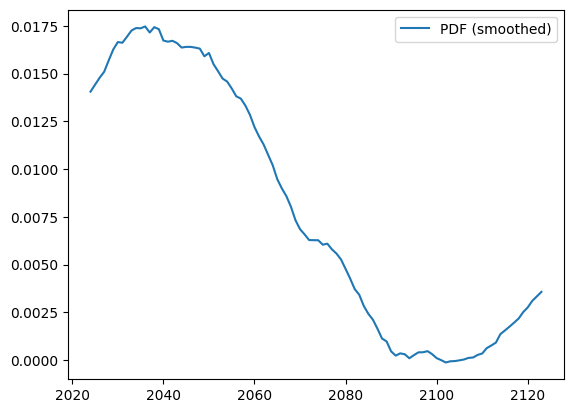

-
-
## TAI FLOP SIZE ##
{1: 26.2,
 5: 27.0,
 10: 28.0,
 20: 30.2,
 30: 32.0,
 40: 33.4,
 50: 34.8,
 60: 36.7,
 70: 38.6,
 80: 41.4,
 90: 45.8,
 95: 63.4,
 99: 67.9}


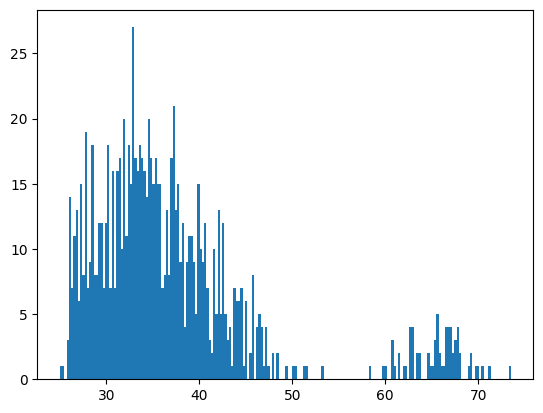

-
-
## MIN REDUCTION: 2 ##
-
## MAX REDUCTION: 5 ##
-
## MIN ALGO DOUBLING RATE: 2 ##
-
## MAX ALGO DOUBLING RATE: 3.5 ##
-
## INITIAL FLOP PER DOLLAR: 17.3 ##
-
## FLOP HALVING RATE: 2.5 ##
-
## MAX FLOP PER DOLLAR: 24 ##
-
## INITIAL PAY: 9 ##
-
## GDP GROWTH: 1.03 ##
-
## MAX GDP FRAC: 0.01 ##
-
## SPEND DOUBLING TIME: 2.5 ##
-
-
-
## GDP Over Time ##


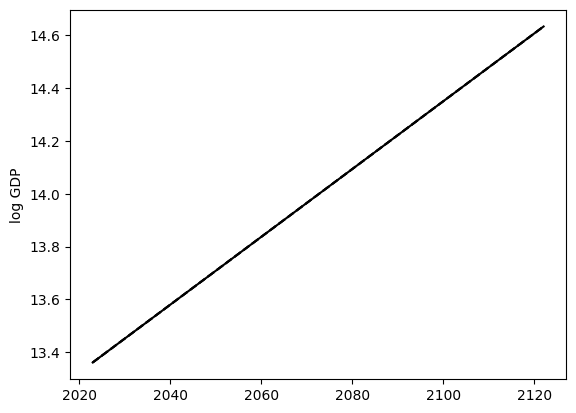

Year: 2023 - GDP log 2022$USD 13.4 (~23 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~23 trillion)
Year: 2024 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2025 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2026 - GDP log 2022$USD 13.4 (~25 trillion) 90% CI 13.4 (~25 trillion) - 13.4 (~25 trillion)
Year: 2027 - GDP log 2022$USD 13.4 (~26 trillion) 90% CI 13.4 (~26 trillion) - 13.4 (~26 trillion)
Year: 2028 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2029 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2030 - GDP log 2022$USD 13.5 (~28 trillion) 90% CI 13.5 (~28 trillion) - 13.5 (~28 trillion)
Year: 2031 - GDP log 2022$USD 13.5 (~29 trillion) 90% CI 13.5 (~29 trillion) - 13.5 (~29 trillion)
Year: 2032 - GDP log 2022$USD 13.5 (~30 trillion) 90% CI 13.5 (~30 trillion) - 13.5 (~30 trillion)
Year: 2033

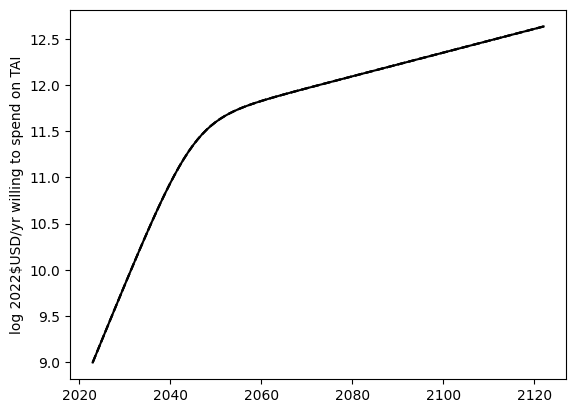

Year: 2023 - willingness log 2022$USD per year 9.0 (~996 million) 90% CI 9.0 (~996 million) - 9.0 (~996 million)
Year: 2024 - willingness log 2022$USD per year 9.1 (~1 billion) 90% CI 9.1 (~1 billion) - 9.1 (~1 billion)
Year: 2025 - willingness log 2022$USD per year 9.2 (~2 billion) 90% CI 9.2 (~2 billion) - 9.2 (~2 billion)
Year: 2026 - willingness log 2022$USD per year 9.4 (~2 billion) 90% CI 9.4 (~2 billion) - 9.4 (~2 billion)
Year: 2027 - willingness log 2022$USD per year 9.5 (~3 billion) 90% CI 9.5 (~3 billion) - 9.5 (~3 billion)
Year: 2028 - willingness log 2022$USD per year 9.6 (~4 billion) 90% CI 9.6 (~4 billion) - 9.6 (~4 billion)
Year: 2029 - willingness log 2022$USD per year 9.7 (~5 billion) 90% CI 9.7 (~5 billion) - 9.7 (~5 billion)
Year: 2030 - willingness log 2022$USD per year 9.8 (~7 billion) 90% CI 9.8 (~7 billion) - 9.8 (~7 billion)
Year: 2031 - willingness log 2022$USD per year 9.9 (~9 billion) 90% CI 9.9 (~9 billion) - 9.9 (~9 billion)
Year: 2032 - willingness log 20

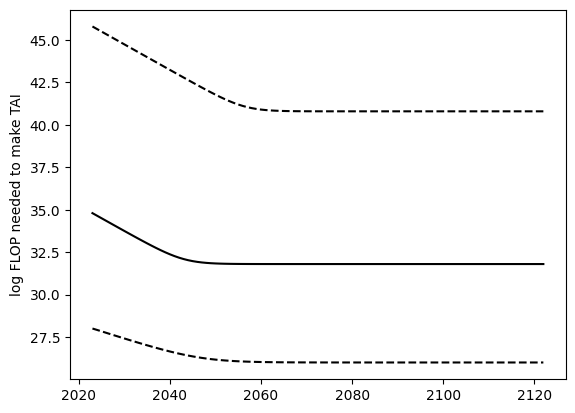

Year: 2023 - log FLOP needed for TAI 34.8 (~63 decillion) 90% CI 28.0 (~10 octillion) - 45.8 (~6 trillion decillion)
Year: 2024 - log FLOP needed for TAI 34.7 (~45 decillion) 90% CI 27.9 (~8 octillion) - 45.6 (~4 trillion decillion)
Year: 2025 - log FLOP needed for TAI 34.5 (~32 decillion) 90% CI 27.8 (~7 octillion) - 45.5 (~3 trillion decillion)
Year: 2026 - log FLOP needed for TAI 34.3 (~22 decillion) 90% CI 27.7 (~6 octillion) - 45.3 (~2 trillion decillion)
Year: 2027 - log FLOP needed for TAI 34.2 (~16 decillion) 90% CI 27.7 (~5 octillion) - 45.2 (~2 trillion decillion)
Year: 2028 - log FLOP needed for TAI 34.0 (~11 decillion) 90% CI 27.6 (~4 octillion) - 45.0 (~1 trillion decillion)
Year: 2029 - log FLOP needed for TAI 33.9 (~8 decillion) 90% CI 27.5 (~3 octillion) - 44.9 (~789 billion decillion)
Year: 2030 - log FLOP needed for TAI 33.8 (~6 decillion) 90% CI 27.4 (~3 octillion) - 44.7 (~558 billion decillion)
Year: 2031 - log FLOP needed for TAI 33.6 (~4 decillion) 90% CI 27.3 (~

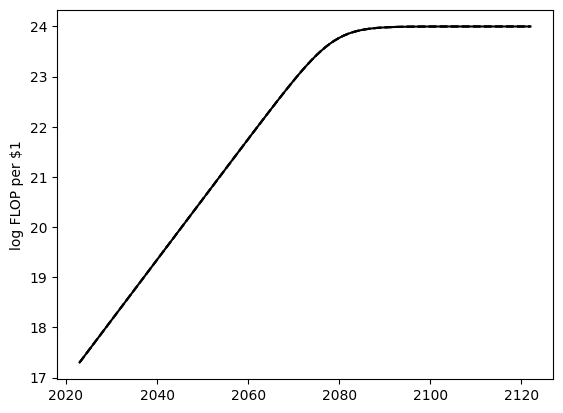

Year: 2023 - log FLOP per 2022$1USD 17.3 (~200 quadrillion) 90% CI 17.3 (~200 quadrillion) - 17.3 (~200 quadrillion)
Year: 2024 - log FLOP per 2022$1USD 17.4 (~263 quadrillion) 90% CI 17.4 (~263 quadrillion) - 17.4 (~263 quadrillion)
Year: 2025 - log FLOP per 2022$1USD 17.5 (~347 quadrillion) 90% CI 17.5 (~347 quadrillion) - 17.5 (~347 quadrillion)
Year: 2026 - log FLOP per 2022$1USD 17.7 (~458 quadrillion) 90% CI 17.7 (~458 quadrillion) - 17.7 (~458 quadrillion)
Year: 2027 - log FLOP per 2022$1USD 17.8 (~605 quadrillion) 90% CI 17.8 (~605 quadrillion) - 17.8 (~605 quadrillion)
Year: 2028 - log FLOP per 2022$1USD 17.9 (~798 quadrillion) 90% CI 17.9 (~798 quadrillion) - 17.9 (~798 quadrillion)
Year: 2029 - log FLOP per 2022$1USD 18.0 (~1 quintillion) 90% CI 18.0 (~1 quintillion) - 18.0 (~1 quintillion)
Year: 2030 - log FLOP per 2022$1USD 18.1 (~1 quintillion) 90% CI 18.1 (~1 quintillion) - 18.1 (~1 quintillion)
Year: 2031 - log FLOP per 2022$1USD 18.3 (~2 quintillion) 90% CI 18.3 (~2 qu

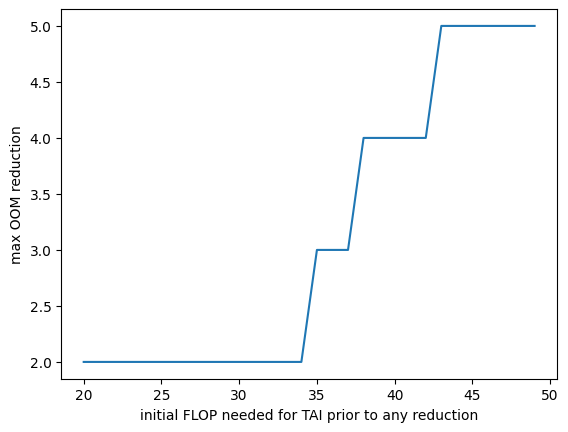

TAI log FLOP 20 -> 2.0 OOM reductions possible
TAI log FLOP 21 -> 2.0 OOM reductions possible
TAI log FLOP 22 -> 2.0 OOM reductions possible
TAI log FLOP 23 -> 2.0 OOM reductions possible
TAI log FLOP 24 -> 2.0 OOM reductions possible
TAI log FLOP 25 -> 2.0 OOM reductions possible
TAI log FLOP 26 -> 2.0 OOM reductions possible
TAI log FLOP 27 -> 2.0 OOM reductions possible
TAI log FLOP 28 -> 2.0 OOM reductions possible
TAI log FLOP 29 -> 2.0 OOM reductions possible
TAI log FLOP 30 -> 2.0 OOM reductions possible
TAI log FLOP 31 -> 2.0 OOM reductions possible
TAI log FLOP 32 -> 2.0 OOM reductions possible
TAI log FLOP 33 -> 2.0 OOM reductions possible
TAI log FLOP 34 -> 2.0 OOM reductions possible
TAI log FLOP 35 -> 3.0 OOM reductions possible
TAI log FLOP 36 -> 3.0 OOM reductions possible
TAI log FLOP 37 -> 3.0 OOM reductions possible
TAI log FLOP 38 -> 4.0 OOM reductions possible
TAI log FLOP 39 -> 4.0 OOM reductions possible
TAI log FLOP 40 -> 4.0 OOM reductions possible
TAI log FLOP 

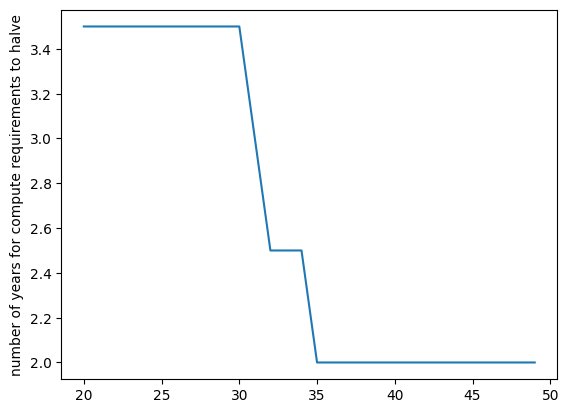

TAI log FLOP 20 -> algo doubling rate 3.5yrs
TAI log FLOP 21 -> algo doubling rate 3.5yrs
TAI log FLOP 22 -> algo doubling rate 3.5yrs
TAI log FLOP 23 -> algo doubling rate 3.5yrs
TAI log FLOP 24 -> algo doubling rate 3.5yrs
TAI log FLOP 25 -> algo doubling rate 3.5yrs
TAI log FLOP 26 -> algo doubling rate 3.5yrs
TAI log FLOP 27 -> algo doubling rate 3.5yrs
TAI log FLOP 28 -> algo doubling rate 3.5yrs
TAI log FLOP 29 -> algo doubling rate 3.5yrs
TAI log FLOP 30 -> algo doubling rate 3.5yrs
TAI log FLOP 31 -> algo doubling rate 3.0yrs
TAI log FLOP 32 -> algo doubling rate 2.5yrs
TAI log FLOP 33 -> algo doubling rate 2.5yrs
TAI log FLOP 34 -> algo doubling rate 2.5yrs
TAI log FLOP 35 -> algo doubling rate 2.0yrs
TAI log FLOP 36 -> algo doubling rate 2.0yrs
TAI log FLOP 37 -> algo doubling rate 2.0yrs
TAI log FLOP 38 -> algo doubling rate 2.0yrs
TAI log FLOP 39 -> algo doubling rate 2.0yrs
TAI log FLOP 40 -> algo doubling rate 2.0yrs
TAI log FLOP 41 -> algo doubling rate 2.0yrs
TAI log FL

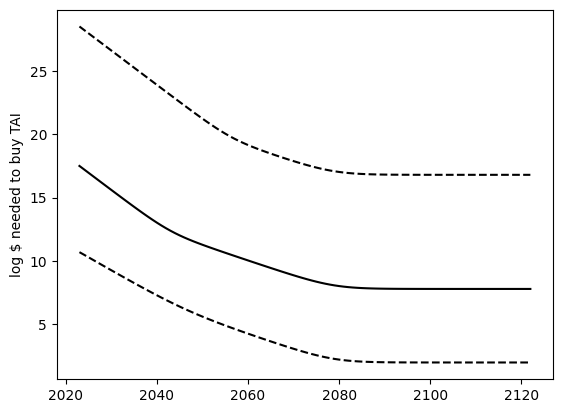

Year: 2023 - 17.5 log 2022$USD to buy TAI (~316 quadrillion) 90% CI 10.7 (~50 billion) - 28.5 (~32 octillion)
Year: 2024 - 17.2 log 2022$USD to buy TAI (~170 quadrillion) 90% CI 10.5 (~32 billion) - 28.2 (~17 octillion)
Year: 2025 - 17.0 log 2022$USD to buy TAI (~91 quadrillion) 90% CI 10.3 (~20 billion) - 28.0 (~9 octillion)
Year: 2026 - 16.7 log 2022$USD to buy TAI (~49 quadrillion) 90% CI 10.1 (~12 billion) - 27.7 (~5 octillion)
Year: 2027 - 16.4 log 2022$USD to buy TAI (~26 quadrillion) 90% CI 9.9 (~8 billion) - 27.4 (~3 octillion)
Year: 2028 - 16.1 log 2022$USD to buy TAI (~14 quadrillion) 90% CI 9.7 (~5 billion) - 27.1 (~1 octillion)
Year: 2029 - 15.9 log 2022$USD to buy TAI (~8 quadrillion) 90% CI 9.5 (~3 billion) - 26.9 (~749 septillion)
Year: 2030 - 15.6 log 2022$USD to buy TAI (~4 quadrillion) 90% CI 9.3 (~2 billion) - 26.6 (~401 septillion)
Year: 2031 - 15.3 log 2022$USD to buy TAI (~2 quadrillion) 90% CI 9.1 (~1 billion) - 26.3 (~215 septillion)
Year: 2032 - 15.1 log 2022$U

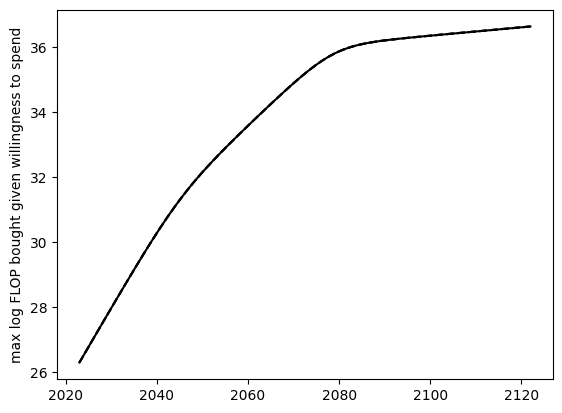

Year: 2023 - max log FLOP 26.3 (~199 septillion) 90% CI 26.3 (~199 septillion) - 26.3 (~199 septillion)
Year: 2024 - max log FLOP 26.5 (~345 septillion) 90% CI 26.5 (~345 septillion) - 26.5 (~345 septillion)
Year: 2025 - max log FLOP 26.8 (~601 septillion) 90% CI 26.8 (~601 septillion) - 26.8 (~601 septillion)
Year: 2026 - max log FLOP 27.0 (~1 octillion) 90% CI 27.0 (~1 octillion) - 27.0 (~1 octillion)
Year: 2027 - max log FLOP 27.3 (~2 octillion) 90% CI 27.3 (~2 octillion) - 27.3 (~2 octillion)
Year: 2028 - max log FLOP 27.5 (~3 octillion) 90% CI 27.5 (~3 octillion) - 27.5 (~3 octillion)
Year: 2029 - max log FLOP 27.7 (~5 octillion) 90% CI 27.7 (~5 octillion) - 27.7 (~5 octillion)
Year: 2030 - max log FLOP 28.0 (~9 octillion) 90% CI 28.0 (~9 octillion) - 28.0 (~9 octillion)
Year: 2031 - max log FLOP 28.2 (~16 octillion) 90% CI 28.2 (~16 octillion) - 28.2 (~16 octillion)
Year: 2032 - max log FLOP 28.5 (~28 octillion) 90% CI 28.5 (~28 octillion) - 28.5 (~28 octillion)
Year: 2033 - max 

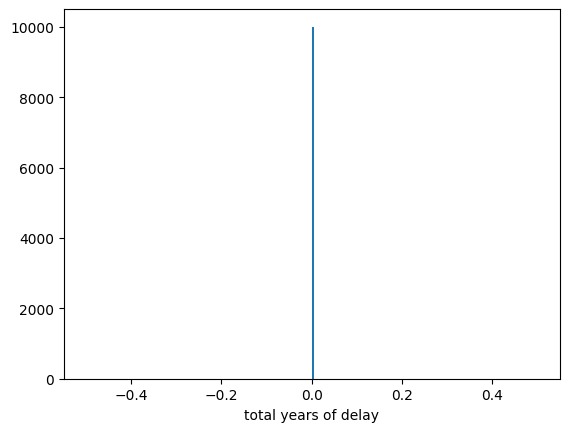

In [5]:
variables = VARIABLE_SETS['Cotra2020']
variables['RUNS'] = RUNS
variables['CURRENT_YEAR'] = CURRENT_YEAR
variables['MAX_YEAR'] = MAX_YEAR
run_timelines_model(variables, cores=5, runs=variables['RUNS'])

## Run Cotra 2022

-
-
## SAMPLE RUN 1 ##
It takes 33.3 log FLOP (~2 decillion) for transformative capabilities.
Every 2.5 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are initially willing to pay 9.0 log 2022$USD (~1 billion). This doubles every 2.5 years to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 27.3 max log FLOP (2 octillion) available - TAI takes 33.3 log FLOP (2 decillion) - log $ 15.0 to buy TAI (1 quadrillion) vs. willingness to pay log $ 9.0 (996 million) - 18.3 log FLOP per $ (2 quintillion)
Year: 2024 - 27.5 max log FLOP (3 octillion) available - TAI takes 33.2 log FLOP (2 decillion) - log $ 14.8 to buy TAI (582 trillion) vs. willingness to pay log $ 9.1 (1 billion) - 18.4 log FLOP per $ (3 quintillion)
Year: 2025 - 27.8 max log FLOP (6 octillion) available - TAI takes 3

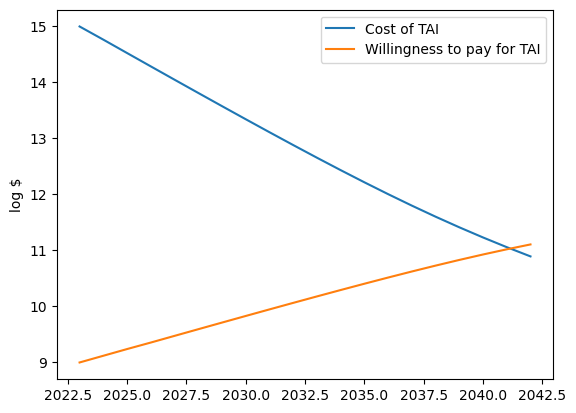

-
-
## SAMPLE RUN 2 ##
It takes 35.3 log FLOP (~200 decillion) for transformative capabilities.
Every 2.0 years algorithms get 2x better, with 3 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are initially willing to pay 9.0 log 2022$USD (~1 billion). This doubles every 2.5 years to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 27.3 max log FLOP (2 octillion) available - TAI takes 35.3 log FLOP (200 decillion) - log $ 17.0 to buy TAI (100 quadrillion) vs. willingness to pay log $ 9.0 (996 million) - 18.3 log FLOP per $ (2 quintillion)
Year: 2024 - 27.5 max log FLOP (3 octillion) available - TAI takes 35.2 log FLOP (141 decillion) - log $ 16.7 to buy TAI (54 quadrillion) vs. willingness to pay log $ 9.1 (1 billion) - 18.4 log FLOP per $ (3 quintillion)
Year: 2025 - 27.8 max log FLOP (6 octillion) available - T

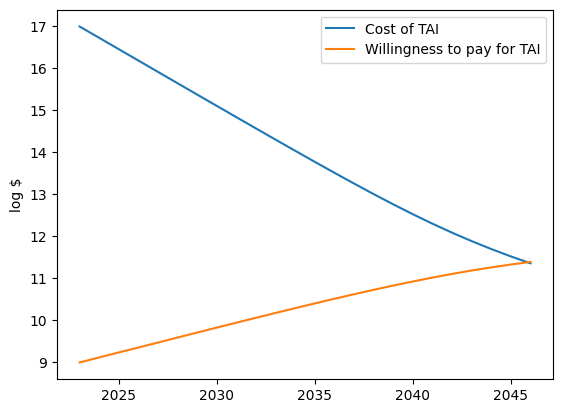

-
-
## SAMPLE RUN 3 ##
It takes 35.8 log FLOP (~631 decillion) for transformative capabilities.
Every 2.0 years algorithms get 2x better, with 3 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 24.0 log FLOP (~1 septillion) per 2022$USD.
We are initially willing to pay 9.0 log 2022$USD (~1 billion). This doubles every 2.5 years to a max of 0.01% of GDP. GDP grows at a rate of 1.03x per year.
---
Year: 2023 - 27.3 max log FLOP (2 octillion) available - TAI takes 35.8 log FLOP (631 decillion) - log $ 17.5 to buy TAI (316 quadrillion) vs. willingness to pay log $ 9.0 (996 million) - 18.3 log FLOP per $ (2 quintillion)
Year: 2024 - 27.5 max log FLOP (3 octillion) available - TAI takes 35.7 log FLOP (447 decillion) - log $ 17.2 to buy TAI (170 quadrillion) vs. willingness to pay log $ 9.1 (1 billion) - 18.4 log FLOP per $ (3 quintillion)
Year: 2025 - 27.8 max log FLOP (6 octillion) available - 

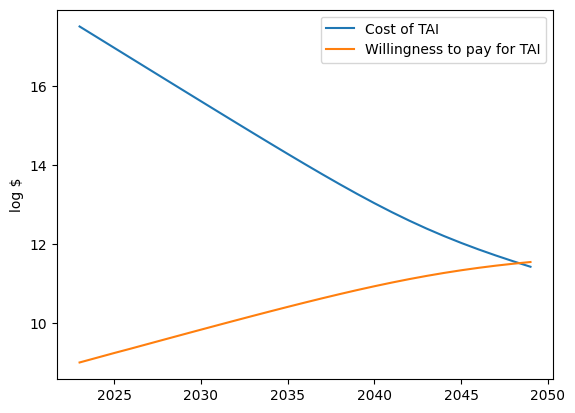

-
-
## RUN TIMELINES MODEL ##
Generating Bayes net with 5 cores...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:19<00:00, 509.70it/s]

Shuffling data...
Waiting for other cores...
.

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 606.22it/s]

...Collected!
Caching in-memory...
...Cached!
...Reducing
...Reduced!
...All done!
-
## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2024',
 '10%: 2026',
 '15%: 2029',
 '20%: 2031',
 '25%: 2033',
 '35%: 2037',
 '50%: 2043',
 '60%: 2047',
 '75%: 2060',
 '80%: 2066',
 '90%: >2123',
 '95%: >2123']
-
-
## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 1 years from now',
 '10%: 3 years from now',
 '15%: 6 years from now',
 '20%: 8 years from now',
 '25%: 10 years from now',
 '35%: 14 years from now',
 '50%: 20 years from now',
 '60%: 24 years from now',
 '75%: 37 years from now',
 '80%: 43 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
-
-
## TAI ARRIVAL DATE BY BIN ##
This year: 4.8%
2024-2027: 5.3%
2028-2029: 6.8%
2030-2034: 10.3%
2035-2039: 12.0%
2040-2049: 24.3%
2050-2059: 10.2%
2060-2069: 7.7%
2070-2079: 2.4%
2080-2089: 0.2%
2090-2099: 0.7%
2100-2109: 0.2%
2110-2119: 0.2%
>2120: 15.1%
-
-
## TAI ARRIVAL DATE BY YEAR ##
By EOY 2024: 6.4%
By EOY 2025: 8.2%
By

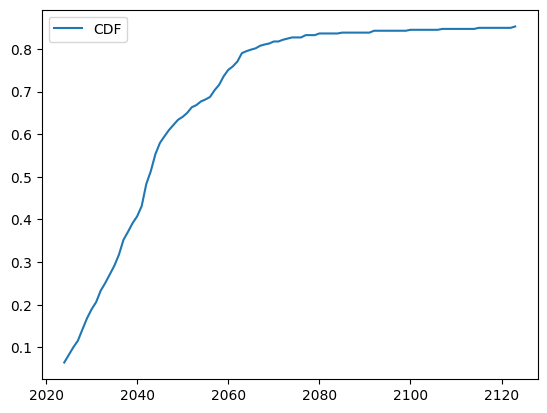

<string>:173: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<string>:174: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

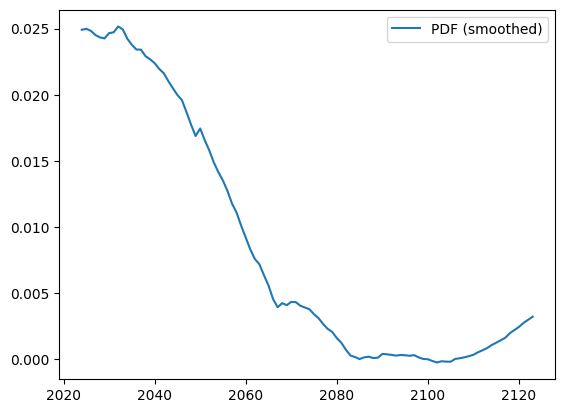

-
-
## TAI FLOP SIZE ##
{1: 26.1,
 5: 27.4,
 10: 28.2,
 20: 30.0,
 30: 31.4,
 40: 32.9,
 50: 34.4,
 60: 35.8,
 70: 37.5,
 80: 39.9,
 90: 42.9,
 95: 48.4,
 99: 67.6}


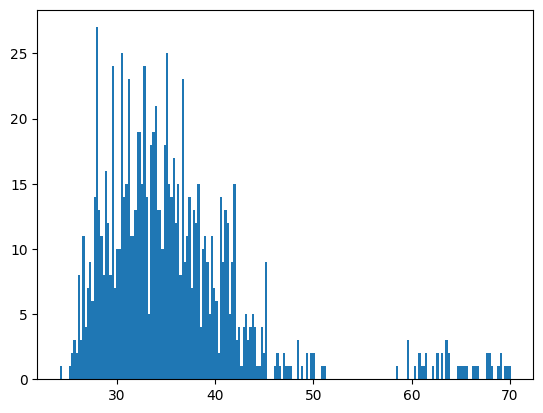

-
-
## MIN REDUCTION: 2 ##
-
## MAX REDUCTION: 5 ##
-
## MIN ALGO DOUBLING RATE: 2 ##
-
## MAX ALGO DOUBLING RATE: 3.5 ##
-
## INITIAL FLOP PER DOLLAR: 18.3 ##
-
## FLOP HALVING RATE: 2.5 ##
-
## MAX FLOP PER DOLLAR: 24 ##
-
## INITIAL PAY: 9 ##
-
## GDP GROWTH: 1.03 ##
-
## MAX GDP FRAC: 0.01 ##
-
## SPEND DOUBLING TIME: 2.5 ##
-
-
-
## GDP Over Time ##


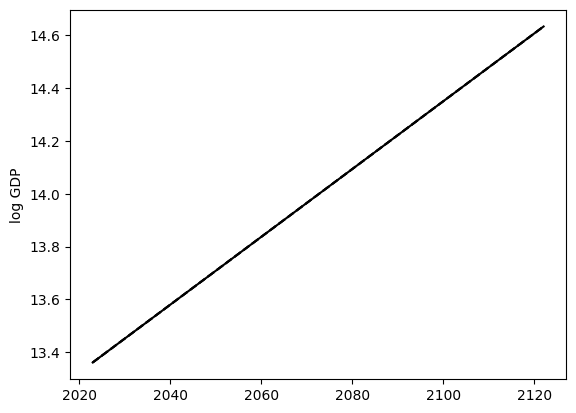

Year: 2023 - GDP log 2022$USD 13.4 (~23 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~23 trillion)
Year: 2024 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2025 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~24 trillion)
Year: 2026 - GDP log 2022$USD 13.4 (~25 trillion) 90% CI 13.4 (~25 trillion) - 13.4 (~25 trillion)
Year: 2027 - GDP log 2022$USD 13.4 (~26 trillion) 90% CI 13.4 (~26 trillion) - 13.4 (~26 trillion)
Year: 2028 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2029 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~27 trillion) - 13.4 (~27 trillion)
Year: 2030 - GDP log 2022$USD 13.5 (~28 trillion) 90% CI 13.5 (~28 trillion) - 13.5 (~28 trillion)
Year: 2031 - GDP log 2022$USD 13.5 (~29 trillion) 90% CI 13.5 (~29 trillion) - 13.5 (~29 trillion)
Year: 2032 - GDP log 2022$USD 13.5 (~30 trillion) 90% CI 13.5 (~30 trillion) - 13.5 (~30 trillion)
Year: 2033

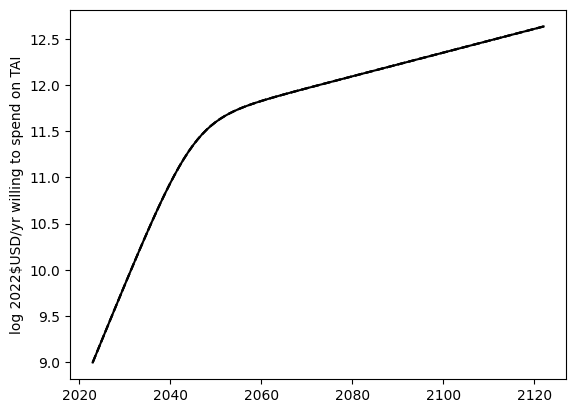

Year: 2023 - willingness log 2022$USD per year 9.0 (~996 million) 90% CI 9.0 (~996 million) - 9.0 (~996 million)
Year: 2024 - willingness log 2022$USD per year 9.1 (~1 billion) 90% CI 9.1 (~1 billion) - 9.1 (~1 billion)
Year: 2025 - willingness log 2022$USD per year 9.2 (~2 billion) 90% CI 9.2 (~2 billion) - 9.2 (~2 billion)
Year: 2026 - willingness log 2022$USD per year 9.4 (~2 billion) 90% CI 9.4 (~2 billion) - 9.4 (~2 billion)
Year: 2027 - willingness log 2022$USD per year 9.5 (~3 billion) 90% CI 9.5 (~3 billion) - 9.5 (~3 billion)
Year: 2028 - willingness log 2022$USD per year 9.6 (~4 billion) 90% CI 9.6 (~4 billion) - 9.6 (~4 billion)
Year: 2029 - willingness log 2022$USD per year 9.7 (~5 billion) 90% CI 9.7 (~5 billion) - 9.7 (~5 billion)
Year: 2030 - willingness log 2022$USD per year 9.8 (~7 billion) 90% CI 9.8 (~7 billion) - 9.8 (~7 billion)
Year: 2031 - willingness log 2022$USD per year 9.9 (~9 billion) 90% CI 9.9 (~9 billion) - 9.9 (~9 billion)
Year: 2032 - willingness log 20

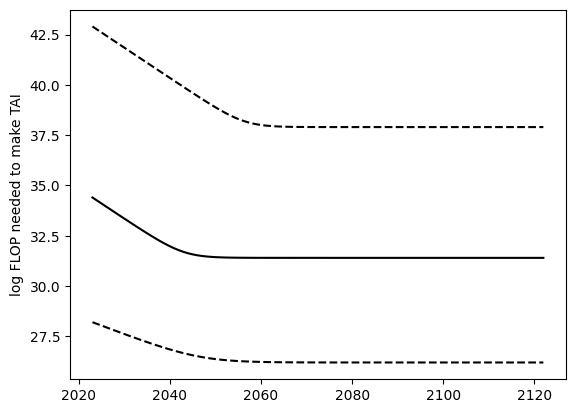

Year: 2023 - log FLOP needed for TAI 34.4 (~25 decillion) 90% CI 28.2 (~16 octillion) - 42.9 (~8 billion decillion)
Year: 2024 - log FLOP needed for TAI 34.3 (~18 decillion) 90% CI 28.1 (~13 octillion) - 42.7 (~6 billion decillion)
Year: 2025 - log FLOP needed for TAI 34.1 (~13 decillion) 90% CI 28.0 (~11 octillion) - 42.6 (~4 billion decillion)
Year: 2026 - log FLOP needed for TAI 33.9 (~9 decillion) 90% CI 27.9 (~9 octillion) - 42.4 (~3 billion decillion)
Year: 2027 - log FLOP needed for TAI 33.8 (~6 decillion) 90% CI 27.9 (~7 octillion) - 42.3 (~2 billion decillion)
Year: 2028 - log FLOP needed for TAI 33.6 (~4 decillion) 90% CI 27.8 (~6 octillion) - 42.1 (~1 billion decillion)
Year: 2029 - log FLOP needed for TAI 33.5 (~3 decillion) 90% CI 27.7 (~5 octillion) - 42.0 (~993 million decillion)
Year: 2030 - log FLOP needed for TAI 33.4 (~2 decillion) 90% CI 27.6 (~4 octillion) - 41.8 (~702 million decillion)
Year: 2031 - log FLOP needed for TAI 33.2 (~2 decillion) 90% CI 27.5 (~3 octil

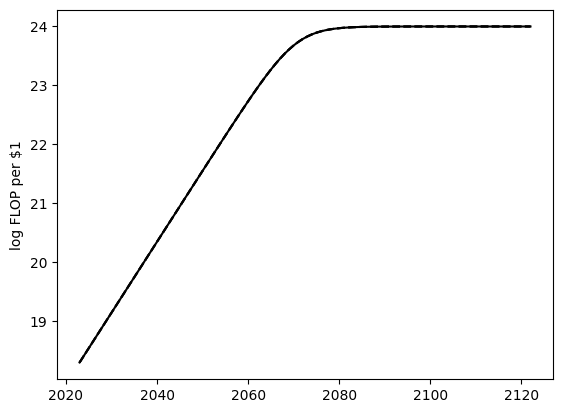

Year: 2023 - log FLOP per 2022$1USD 18.3 (~2 quintillion) 90% CI 18.3 (~2 quintillion) - 18.3 (~2 quintillion)
Year: 2024 - log FLOP per 2022$1USD 18.4 (~3 quintillion) 90% CI 18.4 (~3 quintillion) - 18.4 (~3 quintillion)
Year: 2025 - log FLOP per 2022$1USD 18.5 (~3 quintillion) 90% CI 18.5 (~3 quintillion) - 18.5 (~3 quintillion)
Year: 2026 - log FLOP per 2022$1USD 18.7 (~5 quintillion) 90% CI 18.7 (~5 quintillion) - 18.7 (~5 quintillion)
Year: 2027 - log FLOP per 2022$1USD 18.8 (~6 quintillion) 90% CI 18.8 (~6 quintillion) - 18.8 (~6 quintillion)
Year: 2028 - log FLOP per 2022$1USD 18.9 (~8 quintillion) 90% CI 18.9 (~8 quintillion) - 18.9 (~8 quintillion)
Year: 2029 - log FLOP per 2022$1USD 19.0 (~11 quintillion) 90% CI 19.0 (~11 quintillion) - 19.0 (~11 quintillion)
Year: 2030 - log FLOP per 2022$1USD 19.1 (~14 quintillion) 90% CI 19.1 (~14 quintillion) - 19.1 (~14 quintillion)
Year: 2031 - log FLOP per 2022$1USD 19.3 (~18 quintillion) 90% CI 19.3 (~18 quintillion) - 19.3 (~18 quint

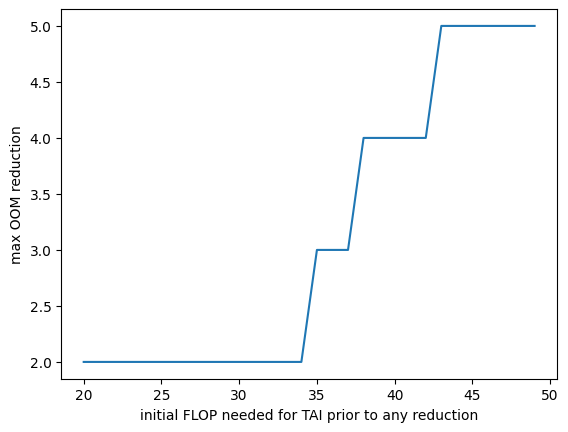

TAI log FLOP 20 -> 2.0 OOM reductions possible
TAI log FLOP 21 -> 2.0 OOM reductions possible
TAI log FLOP 22 -> 2.0 OOM reductions possible
TAI log FLOP 23 -> 2.0 OOM reductions possible
TAI log FLOP 24 -> 2.0 OOM reductions possible
TAI log FLOP 25 -> 2.0 OOM reductions possible
TAI log FLOP 26 -> 2.0 OOM reductions possible
TAI log FLOP 27 -> 2.0 OOM reductions possible
TAI log FLOP 28 -> 2.0 OOM reductions possible
TAI log FLOP 29 -> 2.0 OOM reductions possible
TAI log FLOP 30 -> 2.0 OOM reductions possible
TAI log FLOP 31 -> 2.0 OOM reductions possible
TAI log FLOP 32 -> 2.0 OOM reductions possible
TAI log FLOP 33 -> 2.0 OOM reductions possible
TAI log FLOP 34 -> 2.0 OOM reductions possible
TAI log FLOP 35 -> 3.0 OOM reductions possible
TAI log FLOP 36 -> 3.0 OOM reductions possible
TAI log FLOP 37 -> 3.0 OOM reductions possible
TAI log FLOP 38 -> 4.0 OOM reductions possible
TAI log FLOP 39 -> 4.0 OOM reductions possible
TAI log FLOP 40 -> 4.0 OOM reductions possible
TAI log FLOP 

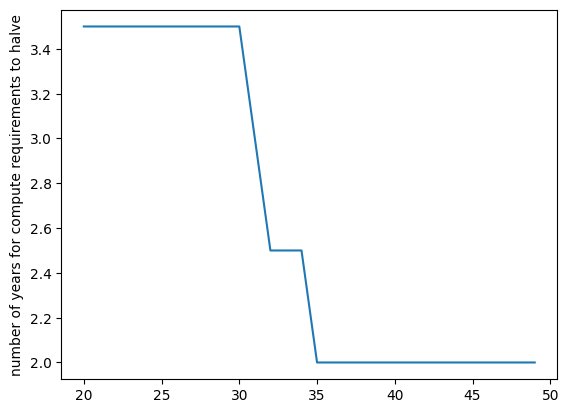

TAI log FLOP 20 -> algo doubling rate 3.5yrs
TAI log FLOP 21 -> algo doubling rate 3.5yrs
TAI log FLOP 22 -> algo doubling rate 3.5yrs
TAI log FLOP 23 -> algo doubling rate 3.5yrs
TAI log FLOP 24 -> algo doubling rate 3.5yrs
TAI log FLOP 25 -> algo doubling rate 3.5yrs
TAI log FLOP 26 -> algo doubling rate 3.5yrs
TAI log FLOP 27 -> algo doubling rate 3.5yrs
TAI log FLOP 28 -> algo doubling rate 3.5yrs
TAI log FLOP 29 -> algo doubling rate 3.5yrs
TAI log FLOP 30 -> algo doubling rate 3.5yrs
TAI log FLOP 31 -> algo doubling rate 3.0yrs
TAI log FLOP 32 -> algo doubling rate 2.5yrs
TAI log FLOP 33 -> algo doubling rate 2.5yrs
TAI log FLOP 34 -> algo doubling rate 2.5yrs
TAI log FLOP 35 -> algo doubling rate 2.0yrs
TAI log FLOP 36 -> algo doubling rate 2.0yrs
TAI log FLOP 37 -> algo doubling rate 2.0yrs
TAI log FLOP 38 -> algo doubling rate 2.0yrs
TAI log FLOP 39 -> algo doubling rate 2.0yrs
TAI log FLOP 40 -> algo doubling rate 2.0yrs
TAI log FLOP 41 -> algo doubling rate 2.0yrs
TAI log FL

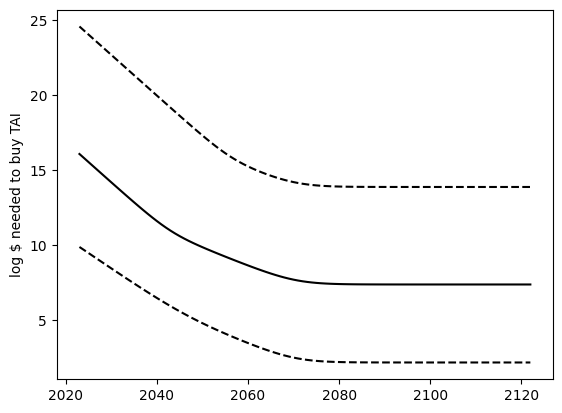

Year: 2023 - 16.1 log 2022$USD to buy TAI (~13 quadrillion) 90% CI 9.9 (~8 billion) - 24.6 (~4 septillion)
Year: 2024 - 15.8 log 2022$USD to buy TAI (~7 quadrillion) 90% CI 9.7 (~5 billion) - 24.3 (~2 septillion)
Year: 2025 - 15.6 log 2022$USD to buy TAI (~4 quadrillion) 90% CI 9.5 (~3 billion) - 24.1 (~1 septillion)
Year: 2026 - 15.3 log 2022$USD to buy TAI (~2 quadrillion) 90% CI 9.3 (~2 billion) - 23.8 (~613 sextillion)
Year: 2027 - 15.0 log 2022$USD to buy TAI (~1 quadrillion) 90% CI 9.1 (~1 billion) - 23.5 (~328 sextillion)
Year: 2028 - 14.7 log 2022$USD to buy TAI (~560 trillion) 90% CI 8.9 (~758 million) - 23.2 (~176 sextillion)
Year: 2029 - 14.5 log 2022$USD to buy TAI (~301 trillion) 90% CI 8.7 (~474 million) - 23.0 (~94 sextillion)
Year: 2030 - 14.2 log 2022$USD to buy TAI (~162 trillion) 90% CI 8.5 (~297 million) - 22.7 (~51 sextillion)
Year: 2031 - 13.9 log 2022$USD to buy TAI (~87 trillion) 90% CI 8.3 (~186 million) - 22.4 (~27 sextillion)
Year: 2032 - 13.7 log 2022$USD to

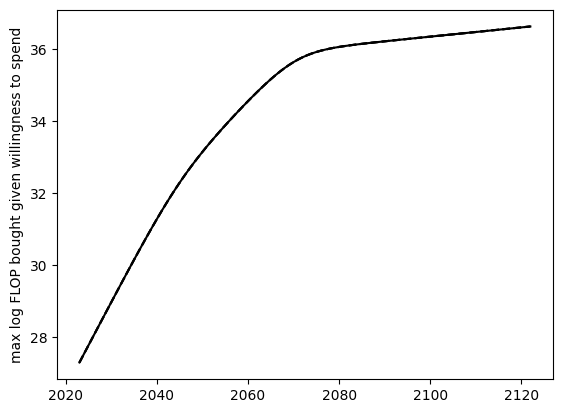

Year: 2023 - max log FLOP 27.3 (~2 octillion) 90% CI 27.3 (~2 octillion) - 27.3 (~2 octillion)
Year: 2024 - max log FLOP 27.5 (~3 octillion) 90% CI 27.5 (~3 octillion) - 27.5 (~3 octillion)
Year: 2025 - max log FLOP 27.8 (~6 octillion) 90% CI 27.8 (~6 octillion) - 27.8 (~6 octillion)
Year: 2026 - max log FLOP 28.0 (~10 octillion) 90% CI 28.0 (~10 octillion) - 28.0 (~10 octillion)
Year: 2027 - max log FLOP 28.3 (~18 octillion) 90% CI 28.3 (~18 octillion) - 28.3 (~18 octillion)
Year: 2028 - max log FLOP 28.5 (~31 octillion) 90% CI 28.5 (~31 octillion) - 28.5 (~31 octillion)
Year: 2029 - max log FLOP 28.7 (~55 octillion) 90% CI 28.7 (~55 octillion) - 28.7 (~55 octillion)
Year: 2030 - max log FLOP 29.0 (~94 octillion) 90% CI 29.0 (~94 octillion) - 29.0 (~94 octillion)
Year: 2031 - max log FLOP 29.2 (~163 octillion) 90% CI 29.2 (~163 octillion) - 29.2 (~163 octillion)
Year: 2032 - max log FLOP 29.5 (~282 octillion) 90% CI 29.5 (~282 octillion) - 29.5 (~282 octillion)
Year: 2033 - max log FL

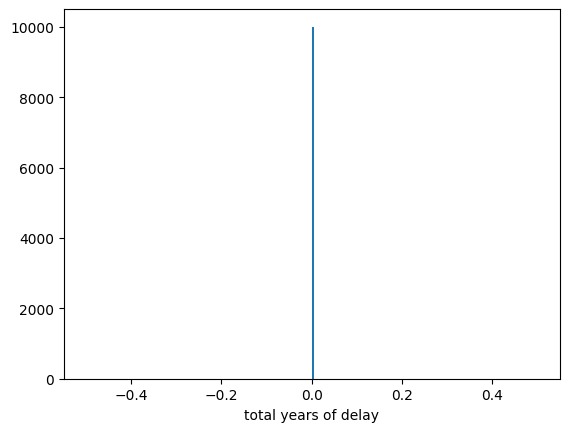

In [6]:
variables = VARIABLE_SETS['Cotra2022']
variables['RUNS'] = RUNS
variables['CURRENT_YEAR'] = CURRENT_YEAR
variables['MAX_YEAR'] = MAX_YEAR
run_timelines_model(variables, cores=5, runs=RUNS)